# pandas-06 피벗, 병합, 인덱스
<img src="http://goo.gl/ht49rJ" >

#### 2017 FinanceData http://fb.com/financedata

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

# 간단한 데이터 전처리
* StringIO - 문자열(str)을 파일로 처리
* 단위 바꾸기, 계산 결과를 재할당

In [2]:
from io import StringIO
import pandas as pd

data="""
month,corp,ad_exp
2013-01, KT, 7039177
2013-02, KT, 6960795
2013-03, KT, 6438333
2013-04, KT, 5024973
2013-05, KT, 7327214
2013-06, KT, 5891620
2013-01, SKT, 5277359
2013-02, SKT, 9523039
2013-03, SKT, 8420870
2013-04, SKT, 8114839
2013-05, SKT, 10809910
2013-06, SKT, 8650904
"""

df = pd.read_csv(StringIO(data))

# '천' 단위를 '억' 단위로
df['ad_exp'] =  df['ad_exp'] / 100000
df

,month,corp,ad_exp
0,2013-01,KT,70.39177
1,2013-02,KT,69.60795
2,2013-03,KT,64.38333
3,2013-04,KT,50.24973
4,2013-05,KT,73.27214
5,2013-06,KT,58.91620
6,2013-01,SKT,52.77359
7,2013-02,SKT,95.23039
8,2013-03,SKT,84.20870
9,2013-04,SKT,81.14839


In [3]:
df['ad_exp']

0      70.39177
1      69.60795
2      64.38333
3      50.24973
4      73.27214
5      58.91620
6      52.77359
7      95.23039
8      84.20870
9      81.14839
10    108.09910
11     86.50904
Name: ad_exp, dtype: float64

# 피벗 (pivot)

In [4]:
pivoted = df.pivot( index='month', columns='corp', values='ad_exp' )
pivoted

corp,KT,SKT
month,,
2013-01,70.39177,52.77359
2013-02,69.60795,95.23039
2013-03,64.38333,84.20870
2013-04,50.24973,81.14839
2013-05,73.27214,108.09910
2013-06,58.91620,86.50904


# 차트

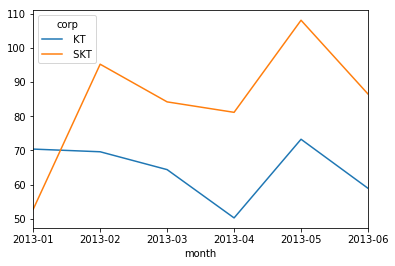

In [5]:
pivoted.plot()

In [6]:
print (pivoted.index)

Index(['2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06'], dtype='object', name='month')


In [7]:
print (pivoted.values)

[[  70.39177   52.77359]
 [  69.60795   95.23039]
 [  64.38333   84.2087 ]
 [  50.24973   81.14839]
 [  73.27214  108.0991 ]
 [  58.9162    86.50904]]


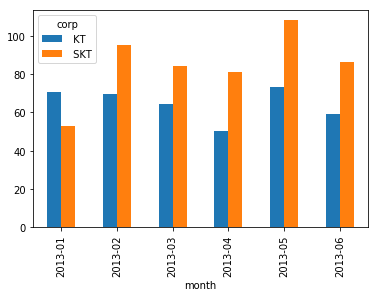

In [8]:
pivoted.plot(kind='bar',figsize=(6, 4))

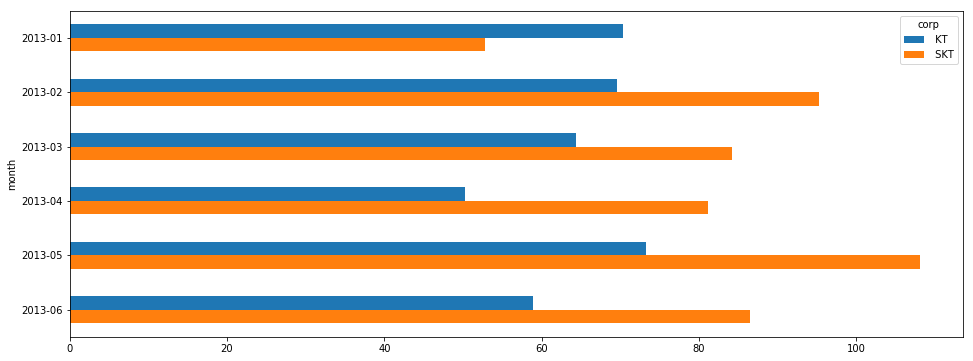

In [9]:
pivoted.plot(kind='barh', figsize=(16, 6))
plt.gca().invert_yaxis()

# 결측치(missing value) 처리

* DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)


In [10]:
import numpy as np
import pandas as pd

data = [
    [np.nan, 20, np.nan, 100], 
    [10, 20, 80, 100], 
    [50, 40, np.nan, 200],
    [np.nan, np.nan, np.nan, 300]
]

df = pd.DataFrame(data, columns=list('ABCD'))
df

,A,B,C,D
0,NaN,20.0,NaN,100
1,10.0,20.0,80.0,100
2,50.0,40.0,NaN,200
3,NaN,NaN,NaN,300


In [11]:
df.dropna()

,A,B,C,D
1,10.0,20.0,80.0,100


In [12]:
df.dropna(axis=0) # axis=0 (default)

,A,B,C,D
1,10.0,20.0,80.0,100


In [13]:
df.dropna(axis=1)

,D
0,100
1,100
2,200
3,300


In [14]:
df.dropna(axis=0, how='all')

,A,B,C,D
0,NaN,20.0,NaN,100
1,10.0,20.0,80.0,100
2,50.0,40.0,NaN,200
3,NaN,NaN,NaN,300


In [15]:
df.dropna(axis=1, how='all')

,A,B,C,D
0,NaN,20.0,NaN,100
1,10.0,20.0,80.0,100
2,50.0,40.0,NaN,200
3,NaN,NaN,NaN,300


# 병합 concat
* pandas.concat()
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html

In [16]:
from IPython.display import display

# 데이터 준비
data_01 = [[11, 12, 13], [14, 15, 16]]
data_02 = [[21, 22, 23], [24, 25, 26]]

df_01 = pd.DataFrame(data_01, columns=list('ABC'))
df_02 = pd.DataFrame(data_02, columns=list('BCD'))

display(df_01)
display(df_02)

,A,B,C
0,11,12,13
1,14,15,16


,B,C,D
0,21,22,23
1,24,25,26


In [17]:
df = pd.concat([df_01, df_02])
df

,A,B,C,D
0,11.0,12,13,NaN
1,14.0,15,16,NaN
0,NaN,21,22,23.0
1,NaN,24,25,26.0


# 인덱스 설정, 재설정
* 설정 df.set_index() - 지정한 컬럼을 인덱스를 지정
* 재설정 df.reset_index() - 인덱스를 초기화 (기존 인덱스는 index 컬럼으로)

In [18]:
# 기존 인덱스는 index 컬럼이 된다

df.reset_index()

,index,A,B,C,D
0,0,11.0,12,13,NaN
1,1,14.0,15,16,NaN
2,0,NaN,21,22,23.0
3,1,NaN,24,25,26.0


In [19]:
# drop=True 하면 기존 인덱스 삭제

df.reset_index(drop=True)

,A,B,C,D
0,11.0,12,13,NaN
1,14.0,15,16,NaN
2,NaN,21,22,23.0
3,NaN,24,25,26.0


In [20]:
관심종목_데이터 = """
종목코드,종목명
005930,삼성전자
000660,SK하이닉스
105560,KB금융
051910,LG화학
090430,아모레퍼시픽
"""

팩터_데이터 = """
종목코드,종목명,PER,PBR,주당배당금,배당수익률
005930,삼성전자,15.91,1.98,21000.0,1.05
000660,SK하이닉스,8.2,1.67,500.0,1.02
005380,현대차,6.12,0.67,4000.0,2.74
015760,한국전력,2.01,0.4,3100.0,7.45
035420,NAVER,45.41,12.41,1100.0,0.14
005490,POSCO,153.39,0.6,8000.0,2.83
012330,현대모비스,7.62,0.93,3500.0,1.43
028260,삼성물산,5.84,1.4,500.0,0.41
055550,신한지주,9.89,0.75,1200.0,2.53
032830,삼성생명,16.75,0.91,1800.0,1.67
105560,KB금융,11.15,0.66,980.0,2.0
017670,SK텔레콤,11.77,1.31,10000.0,4.05
051910,LG화학,17,1.52,4500.0,1.69
"""

In [21]:
from io import StringIO

df_관심종목 = pd.read_csv(StringIO(관심종목_데이터), dtype={'종목코드':np.str})
df_관심종목

,종목코드,종목명
0,005930,삼성전자
1,000660,SK하이닉스
2,105560,KB금융
3,051910,LG화학
4,090430,아모레퍼시픽


In [22]:
df_관심종목.set_index('종목코드', inplace=True)
df_관심종목

,종목명
종목코드,
005930,삼성전자
000660,SK하이닉스
105560,KB금융
051910,LG화학
090430,아모레퍼시픽


In [23]:
df_팩터 = pd.read_csv(StringIO(팩터_데이터), dtype={'종목코드':np.str})
df_팩터.set_index('종목코드', inplace=True)
df_팩터

,종목명,PER,PBR,주당배당금,배당수익률
종목코드,,,,,
005930,삼성전자,15.91,1.98,21000.0,1.05
000660,SK하이닉스,8.20,1.67,500.0,1.02
005380,현대차,6.12,0.67,4000.0,2.74
015760,한국전력,2.01,0.40,3100.0,7.45
035420,NAVER,45.41,12.41,1100.0,0.14
005490,POSCO,153.39,0.60,8000.0,2.83
012330,현대모비스,7.62,0.93,3500.0,1.43
028260,삼성물산,5.84,1.40,500.0,0.41
055550,신한지주,9.89,0.75,1200.0,2.53


In [24]:
df_관심종목['PER'] = df_팩터['PER']
df_관심종목['PBR'] = df_팩터['PBR']
df_관심종목[['주당배당금', '배당수익률']] = df_팩터[['주당배당금', '배당수익률']]
df_관심종목

,종목명,PER,PBR,주당배당금,배당수익률
종목코드,,,,,
005930,삼성전자,15.91,1.98,21000.0,1.05
000660,SK하이닉스,8.20,1.67,500.0,1.02
105560,KB금융,11.15,0.66,980.0,2.00
051910,LG화학,17.00,1.52,4500.0,1.69
090430,아모레퍼시픽,NaN,NaN,NaN,NaN


# 요약
* pivoted = df.pivot( index='date', columns='corp', values='vals' )
* 결측치(missing value): df.dropna(inplace=False)
* 병합: pandas.concat()
* 인덱스 설정 df.set_index(), 재설정 df.reset_index()
* 인덱스 기준으로 컬럼 복사 (활용도가 높다)

----
#### 2017 FinanceData http://fb.com/financedata http://financedata.github.com